In [345]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
import ydata_profiling
from quickda.clean_data import *

In [346]:
# Leer archivo csv
df = pd.read_csv('./Datasets/CompleteDataset.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  object 
 11  Wage                 17981 non-null  object 
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  object 
 14  Aggression           17981 non-null  object 
 15  Agility              17981 non-null 

In [347]:
df.describe()

,Unnamed: 0,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,8990.000000,25.144541,66.247984,71.190813,1594.095100,59.251755,55.550464,56.865283,59.030028,58.506833,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,5190.811931,4.614272,6.987965,6.102199,272.151435,9.880164,12.192579,10.310178,9.926988,8.888040,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,0.000000,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,26.000000,27.000000,30.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,4495.000000,21.000000,62.000000,67.000000,1449.000000,53.000000,45.000000,49.000000,53.000000,53.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,8990.000000,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,59.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,13485.000000,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.000000,65.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,17980.000000,47.000000,94.000000,94.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,87.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


En esta ocasión, y debido a la gran cantidad de columnas, se decidió no utilizar el profiler de pandas. Pero, se revisó en la página de dónde se obtuvieron los datos las gráficas sobre cada columna que este brindaba. De ella se pueden hacer las siguientes observaciones: 
- En las últimas columnas, el 10% de los datos son nulos. 
- Existen muchos datos atípicos
- No se pueden observar muy bien, pero las gráficas de GK son especiales, probablemente porque la mayoría de ellas aplican solo a los porteros. 


## Limpieza de datos

In [348]:
df['Curve'][412] # Se puede observar que los números no son todos numéricos

'60+7'

In [349]:
# Convertir las columnas no númericas a numéricas

In [350]:
df['Value'][0]

'€95.5M'

In [351]:
# Columna value de dinero a valor

for x in range(len(df['Value'])):
    og = df['Value'][x]
    temp = og.removeprefix('€')
    temp = temp.removesuffix('M')
    temp = temp.removesuffix('K')
    temp = float(temp)
    # convertir los números que eran
    if (og[len(og) - 1] == 'M'):
        temp = temp * 1000000
    if (og[len(og) - 1] == 'K'):
        temp = temp * 1000
    temp = int(temp)
    df.loc[x, 'Value'] = temp

df = df.astype({'Value':'int'})
df['Value']

0         95500000
1        105000000
2        123000000
3         97000000
4         61000000
           ...    
17976        50000
17977            0
17978        60000
17979        60000
17980        50000
Name: Value, Length: 17981, dtype: int32

In [352]:
# Columna Wage de dinero a valor

for x in range(len(df['Wage'])):
    og = df['Wage'][x]
    temp = og.removeprefix('€')
    temp = temp.removesuffix('M')
    temp = temp.removesuffix('K')
    temp = float(temp)
    # convertir los números que eran
    if (og[len(og) - 1] == 'M'):
        temp = temp * 1000000
    if (og[len(og) - 1] == 'K'):
        temp = temp * 1000
    temp = int(temp)
    df.loc[x, 'Wage'] = temp

df = df.astype({'Wage':'int'})
df['Wage']

0        565000
1        565000
2        280000
3        510000
4        230000
          ...  
17976      1000
17977      1000
17978      1000
17979      1000
17980      1000
Name: Wage, Length: 17981, dtype: int32

In [353]:
# De num + num a total
masCols = ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing',
           'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK positioning', 
           'GK kicking', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots',
           'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
           'Sprint speed', 'Stamina', 'Standing tackle', 'Sprint speed', 'Stamina', 'Strength', 'Vision',
           'Volleys'
          ] # Columnas que sufren de este formato

for col in masCols:
    for x in range(len(df[col])):
        temp = df[col][x]
        if (type(temp) != int and type(temp) != np.int32): 
            if temp.__contains__('+'):
                temp2 = temp.split('+')
                a = int(temp2[0])
                b = int(temp2[1])
                temp = a + b
            elif temp.__contains__('-'):
                a = int(temp2[0])
                b = int(temp2[1])
                temp = a - b
            temp = int(temp)
        df.loc[x, col] = temp
        
    # cambiar el tipo de dato 
    df = df.astype({col: 'int'})

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  int32  
 11  Wage                 17981 non-null  int32  
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  int32  
 14  Aggression           17981 non-null  int32  
 15  Agility              17981 non-null 

<AxesSubplot: >

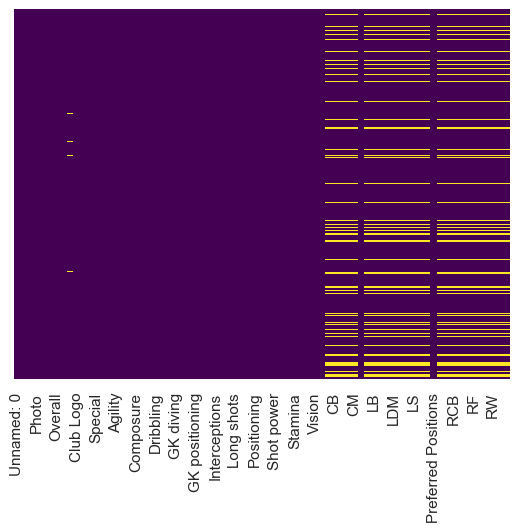

In [355]:
# Revisar datos nulos
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [356]:
# Botar las vacías en club
df.dropna(subset = ['Club'], inplace = True)

Según los las tablas que muestra donde se consiguieron los datos, para las columnas que se encuentran al final el 11% de los datos falta. Investigando sobre la data y sobre los jugadores, se pudo notar que Todos estos datos faltantes son de jugadores que juegan la posición
de portero, por lo que muchos de los atributos no cuentan para ellos. 

Por esa misma razón se decidión eliminar las columnas con datos faltantes en vez de elimninar a los jugadores para que de esa manera no se tomaran en cuenta todos los jugadores menos porteros. 

In [357]:
df.dropna(how='any', axis=1, inplace = True)

<AxesSubplot: >

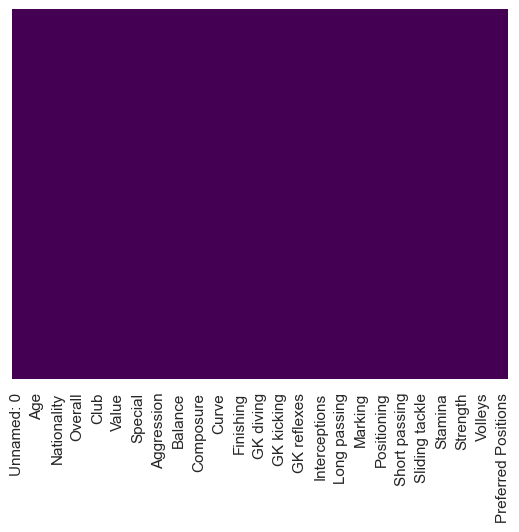

In [358]:
# Revisar si quedaron datos nulos
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [359]:
# botamos otra columnas como el nombre, foto y bandera que no ayudan en el modelo
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('Name', axis = 1)
df = df.drop('Photo', axis = 1)
df = df.drop('Flag', axis = 1)
df = df.drop('Club Logo', axis = 1)
df = df.drop('ID', axis = 1)

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17733 entries, 0 to 17980
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  17733 non-null  int64 
 1   Nationality          17733 non-null  object
 2   Overall              17733 non-null  int64 
 3   Potential            17733 non-null  int64 
 4   Club                 17733 non-null  object
 5   Value                17733 non-null  int32 
 6   Wage                 17733 non-null  int32 
 7   Special              17733 non-null  int64 
 8   Acceleration         17733 non-null  int32 
 9   Aggression           17733 non-null  int32 
 10  Agility              17733 non-null  int32 
 11  Balance              17733 non-null  int32 
 12  Ball control         17733 non-null  int32 
 13  Composure            17733 non-null  int32 
 14  Crossing             17733 non-null  int32 
 15  Curve                17733 non-null  int32 
 16  Drib

### Normalización

In [362]:
dummies_n = pd.get_dummies(df['Nationality'])
dummies_c = pd.get_dummies(df['Club'])
dummies_pp = pd.get_dummies(df['Preferred Positions'])

In [365]:
df = pd.concat([df, dummies_n, dummies_c, dummies_pp], axis = 1)

In [366]:
df = df.drop(['Nationality', 'Club', 'Preferred Positions'], axis = 1)

In [369]:
df.head()

,Age,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,...,ST RM CF,ST RM LM,ST RM LM CAM,ST RM LW,ST RM RB,ST RM RW,ST RW,ST RW CAM,ST RW LW,ST RW RM
0,32,94,94,95500000,565000,2228,89,63,89,63,...,0,0,0,0,0,0,0,0,0,0
1,30,93,93,105000000,565000,2154,92,48,90,95,...,0,0,0,0,0,0,0,0,0,0
2,25,92,94,123000000,280000,2100,94,56,96,82,...,0,0,0,0,0,0,0,0,0,0
3,30,92,92,97000000,510000,2291,88,78,86,60,...,0,0,0,0,0,0,0,0,0,0
4,31,92,92,61000000,230000,1493,58,29,52,35,...,0,0,0,0,0,0,0,0,0,0


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17733 entries, 0 to 17980
Columns: 1644 entries, Age to ST RW RM 
dtypes: int32(36), int64(4), uint8(1604)
memory usage: 30.2 MB


## Modelo

Basado en: https://anderfernandez.com/en/blog/code-decision-tree-python-from-scratch/

### Generación de dataframe con valores

In [371]:
df_X = df.drop(['Potential'], axis = 1) # Potential es nuestro y
X = df_X.iloc[:, :].values
X

array([[       32,        94,  95500000, ...,         0,         0,
                0],
       [       30,        93, 105000000, ...,         0,         0,
                0],
       [       25,        92, 123000000, ...,         0,         0,
                0],
       ...,
       [       17,        46,     60000, ...,         0,         0,
                0],
       [       18,        46,     60000, ...,         0,         0,
                0],
       [       18,        46,     50000, ...,         0,         0,
                0]], dtype=int64)

In [372]:
# y = df.iloc[:, 7].values
y = df.iloc[:, 7].values
y

array([63, 48, 56, ..., 26, 46, 52])

### Separación del modelo

In [373]:
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.2, random_state = 100)


In [374]:
X_entreno 

array([[     19,      55,  160000, ...,       0,       0,       0],
       [     25,      68, 1200000, ...,       0,       0,       0],
       [     23,      60,  230000, ...,       0,       0,       0],
       ...,
       [     25,      63,  400000, ...,       0,       0,       0],
       [     24,      60,  280000, ...,       0,       0,       0],
       [     28,      70, 1800000, ...,       0,       0,       0]],
      dtype=int64)

In [375]:
y_entreno

array([26, 31, 20, ..., 22, 41, 53])

## Impureza de Gini y otras funciones

In [376]:
model = DecisionTreeClassifier(max_depth = 10, min_samples_leaf=2, min_samples_split=2)
model.fit(X_entreno, y_entreno)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

In [377]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_prueba)
print(f'Accuracy for self built model {accuracy_score(y_prueba, y_pred)}')

Accuracy for self built model 0.5678037778404286


## Comparación

In [386]:
from sklearn.tree import DecisionTreeRegressor

In [388]:
modeloR = DecisionTreeRegressor()

In [389]:
modeloR.fit(X_entreno, y_entreno)

DecisionTreeRegressor()

In [390]:
y_predicciones = modeloR.predict(X_prueba)

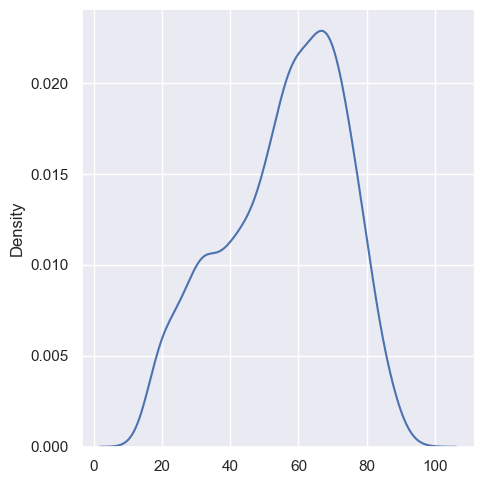

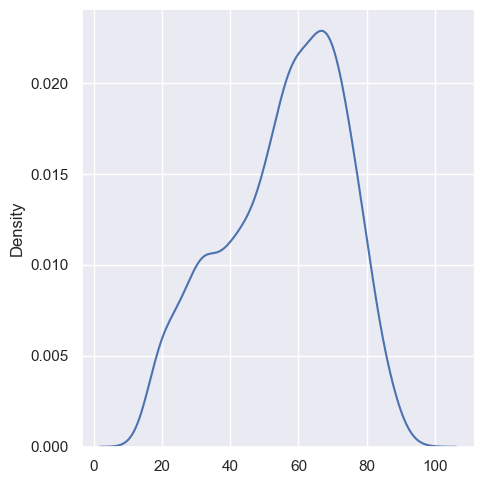

In [403]:
sns.displot(y_prueba, kind="kde")
sns.displot(y_predicciones, kind="kde")

In [404]:
from sklearn.metrics import confusion_matrix, classification_report

In [405]:
confusion_matrix(y_prueba, y_predicciones)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 6, 0, 0],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [408]:
from sklearn.metrics import accuracy_score
accuracy_score(y_prueba, y_predicciones)

1.0